# Electricity consumption  of Helsinki city


Importing data from online databse using api

In [1]:
import requests
import csv

location_link = 'https://helsinki-openapi.nuuka.cloud/api/v1.0/Property/List'
headers = {
    'user_agent': 'https://helsinki-openapi.nuuka.cloud/api/v1.0/Property/List'
}

page = requests.get(location_link, headers=headers)
response = page.json()

csv_file = 'data.csv'

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp', 'Location', 'Value', 'Unit'])

    for item in response:
        location_Name = item['locationName']
        new_url = f'https://helsinki-openapi.nuuka.cloud/api/v1.0/EnergyData/Daily/ListByProperty?Record=LocationName&SearchString={location_Name}&ReportingGroup=Electricity&StartTime=2019-01-01&EndTime=2019-12-31'

        # Make a request to the new_url
        page = requests.get(new_url, headers=headers)
        
        if page.status_code == 200:
            json_data = page.json()
            
            # Process the JSON data and write to CSV
            for data in json_data:
                timestamp = data['timestamp']
                locationName = data['locationName']
                value = data['value']
                unit = data['unit']

                if isinstance(value, float):
                    value = str(value)  # Convert float to string or handle it as desired

                writer.writerow([timestamp, locationName, value, unit])
        else:
            print(f"Request failed for location: {location_Name}")

print(f"CSV file '{csv_file}' created successfully.")


Request failed for location: 1597 Lpk Lauttasaaren Ankkalampi (disabloitu)
Request failed for location: 1690 Oulunkylän seurahuone
Request failed for location: 1771 Pohjoiskaari  50 (disabloitu)
Request failed for location: 1804 Riihenkulma 2/Vanha Helsingintie 2
Request failed for location: 1832 Lpk Tammi/Metsolan ala-asteen koulu
Request failed for location: 1885 Itä-Helsingin musiikkiopisto ja Strömsin kartano
Request failed for location: 2203 Stadin am op/Teollisuuskatu 23
Request failed for location: 4023 Olympiastadion/PO
Request failed for location: 4135 Perhekoti Marttila
Request failed for location: 4162 Lpk Yliskylä
Request failed for location: 4329 Kivelän vanhustenkeskus, Lpk Kivelä, Lpk Vaahtera
Request failed for location: 4356 Suutarilan terveyskeskus
Request failed for location: 4392 Strandmaninkuja 1, Stara Tuomarinkylän kartano
Request failed for location: 4420 Suutarinkylän peruskoulu+päiväkoti Vaskiniitty
Request failed for location: 4426 Stadin ammattiopisto/Sturen

Request failed for location: 6838 Paviljonki- lpk Vilppula ja Suvi
Request failed for location: 6842 Paviljonki- lpk Kallahti lisätila
Request failed for location: 6844 Paviljonki- lpk Kukkaniitty ja Blomängen
Request failed for location: 6849 Paviljonki- lpk Ariel
Request failed for location: 6850 Paviljonki- lpk Satulinna ja leikkip Tapuli
Request failed for location: 6853 Paviljonki- lpk Perhonen
Request failed for location: 6855 Paviljonki- Kontulan koulu
Request failed for location: 6881 Vuoniityn peruskoulun lisätilat
Request failed for location: 6882 Roihuvuoren ala-asteen ja esiopetuksen lisätilat
Request failed for location: 6883 Kannelmäen peruskoulun lisätilat II
Request failed for location: 6885 Oulunkylän ala-asteen lisätilat, paviljonki 69350
Request failed for location: 6889 Paviljonki- lpk Longinoja ja lp Filpus
Request failed for location: 6917 Nurkkatien monitoimitalon päiväkodin lisätila
Request failed for location: 6921 Metsolan ala-asteen väistötilat/ulkoavuokratut

Request failed for location: 6795 Paviljonki- lpk Violanpuisto, 67177 paviljonki 01
Request failed for location: 4498 Porolahti väestönsuoja, 25865 väestönsuoja
Request failed for location: 4535 Kampin keskus/kaukoliikenne, 999700 rak 001
Request failed for location: 6821 Suutarilan ala-asteen lisätila, päiväkoti, 67519 tilaelementti rak 001
Request failed for location: 4571 Maunulan maja/PO, 42104 005
Request failed for location: 4572 Merimelojien maja/PO, 3078 maja
Request failed for location: 4575 Myllypuron liikuntapuisto/PO, 46342 rak 027
Request failed for location: 6829 Helsingin Kalasataman Kymppi Koy, 66440 Kymp-talo rak 001
Request failed for location: 4577 Paloheinän ulkoilumaja/PO, 40650 rak 046
Request failed for location: 6838 Paviljonki- lpk Vilppula ja Suvi, 67927 päiväkotirakennus
Request failed for location: 6842 Paviljonki- lpk Kallahti lisätila, 68061 Rak 001
Request failed for location: 4580 Pukinmäen liikuntapuisto/PO, 46341 Huoltorakennus
Request failed for locat

In [4]:
#Import all Libraries
import numpy as np
import pandas as pd
import datetime # manipulating date formats
import os
import datetime
from matplotlib import pyplot as plt
import scipy.stats as stats


The provided DataFrame contains energy consumption data for different locations during the time period from January 1, 2019, to 

The columns in the DataFrame are:


--Timestamp: Represents the date and time of the energy consumption measurement.

--Location: Indicates the name of the location where the measurement was taken.

--Value: Represents the energy consumption value for the corresponding timestamp and location.

--Unit: Indicates the unit of measurement for energy consumption (kWh).



In [5]:
df = pd.read_csv('data.csv', encoding='latin1')
df

,Timestamp,Location,Value,Unit
0,2019-01-08T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh
1,2019-01-09T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh
2,2019-01-10T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh
3,2019-01-11T00:00:00,1000 Hakaniemen kauppahalli,20.10,kWh
4,2019-01-12T00:00:00,1000 Hakaniemen kauppahalli,30.56,kWh
...,...,...,...,...
205317,2019-01-02T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,15.96,kWh
205318,2019-01-03T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,16.98,kWh
205319,2019-01-04T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,20.16,kWh
205320,2019-01-05T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,0.00,kWh


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205322 entries, 0 to 205321
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  205322 non-null  object 
 1   Location   205322 non-null  object 
 2   Value      205322 non-null  float64
 3   Unit       205322 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.3+ MB


In [7]:
df.describe()  #Here only Value is Numeric. So we are gettiing insights from Value

,Value
count,205322.000000
mean,926.803897
std,1929.406757
min,0.000000
25%,159.900000
50%,365.580000
75%,916.217500
max,33236.860000


In [8]:
df['Location'].describe() #how many Unique city have in this  dataframe

count                         205322
unique                           579
top       4027 Tahvonlahden ala-aste
freq                             365
Name: Location, dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date  #just take the date part and drop the time part
df['Date']


0         2019-01-08
1         2019-01-09
2         2019-01-10
3         2019-01-11
4         2019-01-12
             ...    
205317    2019-01-02
205318    2019-01-03
205319    2019-01-04
205320    2019-01-05
205321    2019-01-06
Name: Date, Length: 205322, dtype: object

In [10]:
df # See New dataframe

,Timestamp,Location,Value,Unit,Date
0,2019-01-08T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh,2019-01-08
1,2019-01-09T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh,2019-01-09
2,2019-01-10T00:00:00,1000 Hakaniemen kauppahalli,0.00,kWh,2019-01-10
3,2019-01-11T00:00:00,1000 Hakaniemen kauppahalli,20.10,kWh,2019-01-11
4,2019-01-12T00:00:00,1000 Hakaniemen kauppahalli,30.56,kWh,2019-01-12
...,...,...,...,...,...
205317,2019-01-02T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,15.96,kWh,2019-01-02
205318,2019-01-03T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,16.98,kWh,2019-01-03
205319,2019-01-04T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,20.16,kWh,2019-01-04
205320,2019-01-05T00:00:00,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,0.00,kWh,2019-01-05


In [11]:
df = df[['Date','Location','Value','Unit']]
df   #See new dataframe

,Date,Location,Value,Unit
0,2019-01-08,1000 Hakaniemen kauppahalli,0.00,kWh
1,2019-01-09,1000 Hakaniemen kauppahalli,0.00,kWh
2,2019-01-10,1000 Hakaniemen kauppahalli,0.00,kWh
3,2019-01-11,1000 Hakaniemen kauppahalli,20.10,kWh
4,2019-01-12,1000 Hakaniemen kauppahalli,30.56,kWh
...,...,...,...,...
205317,2019-01-02,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,15.96,kWh
205318,2019-01-03,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,16.98,kWh
205319,2019-01-04,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,20.16,kWh
205320,2019-01-05,2287 Lpk Lasten Kartano/Malminkartanon nuoriso...,0.00,kWh


In [12]:
df.groupby(['Unit','Location'])['Location'].count()
#here we see that all of our Electricity Unit is not KWh. One city has another Measurement Unit as well (m3)

Unit  Location                                                                       
kWh   1000 Hakaniemen kauppahalli                                                        358
      1001 Hietalahden kauppahalli                                                       361
      1002 Vanha kauppahalli                                                             361
      1037 Vuotalo                                                                       361
      1507 Suutarilan monitoimitalo/ala-aste ja Lpk Seulanen                             361
                                                                                        ... 
      6478 Savonkatu 4, Stadin ammattiopisto                                             361
      6492 Kontukuja 5, Kontulan monipuolinen palvelukeskus                              361
      6743 Kivikonkuja 4, terveydenhuollon päätearkisto                                  361
      6760 Kaupunkiympäristön toimiala, 44572 Kaupunkiympäristön toimitalo (d

In [13]:
new_df = df[df['Unit']!='m3']
new_df.groupby(['Unit','Location'])['Location'].count()   
#number of recorded values are not same. so there is maybe some missing values as well. 

Unit  Location                                                                       
kWh   1000 Hakaniemen kauppahalli                                                        358
      1001 Hietalahden kauppahalli                                                       361
      1002 Vanha kauppahalli                                                             361
      1037 Vuotalo                                                                       361
      1507 Suutarilan monitoimitalo/ala-aste ja Lpk Seulanen                             361
                                                                                        ... 
      6477 Muotoilijankatu 3, Stadin ammattiopisto                                       361
      6478 Savonkatu 4, Stadin ammattiopisto                                             361
      6492 Kontukuja 5, Kontulan monipuolinen palvelukeskus                              361
      6743 Kivikonkuja 4, terveydenhuollon päätearkisto                      

In [14]:
groups_loc = df.groupby('Location')

# divide into different dataframes for each location
locs = [groups_loc.get_group(loc).set_index('Date')['Value'] for loc in groups_loc.groups]

# remove duplicated rows
locs = [df[~df.index.duplicated(keep='first')] for df in locs]

Date_loc = pd.concat(locs, join='outer', axis=1,  ignore_index=True)

Date_loc.reset_index(level=0, inplace=True)

Date_loc.rename(columns={'index': 'Date'}, inplace=True)

#Date_loc.columns = groups_loc.groups.keys() #location namewise in column

Date_loc


,Date,0,1,2,3,4,5,6,7,8,...,569,570,571,572,573,574,575,576,577,578
0,2019-01-08,0.00,1104.55,619.45,2585.05,2327.51,749.28,345.56,609.94,0.36,...,741.57,360.21,944.46,1427.64,3410.96,2097.2,2349.11,6270.62,911.35,NaN
1,2019-01-09,0.00,1164.13,600.80,2570.44,2321.11,723.47,338.88,610.81,0.35,...,763.84,344.86,926.57,1404.36,3505.27,2101.2,2335.64,5944.73,896.33,NaN
2,2019-01-10,0.00,1135.66,641.95,2557.09,2211.68,731.94,407.72,647.74,0.35,...,781.25,327.00,953.79,1455.24,3605.95,2092.8,2190.52,5860.85,912.56,NaN
3,2019-01-11,20.10,1211.13,614.15,2336.15,2183.17,667.25,416.68,646.19,0.35,...,733.31,318.27,885.38,1459.80,3397.60,2050.8,2346.09,5857.86,946.08,NaN
4,2019-01-12,30.56,1167.51,610.50,2031.74,1391.16,328.37,188.12,625.18,0.35,...,535.97,144.78,456.39,1179.00,1230.13,1084.0,1217.48,5102.65,819.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-01-03,NaN,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.35,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,NaN
361,2019-01-04,NaN,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.35,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,NaN
362,2019-01-05,NaN,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.36,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,NaN
363,2019-01-06,NaN,871.43,604.40,1850.46,1327.76,287.13,73.68,673.51,0.35,...,564.88,141.58,506.82,887.16,1080.30,1070.0,1025.74,5216.87,806.08,NaN


In [15]:
Date_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Columns: 580 entries, Date to 578
dtypes: float64(579), object(1)
memory usage: 1.6+ MB


In [16]:
Date_loc.isnull().sum()

Date     0
0        7
1        4
2        4
3        4
        ..
574      4
575      4
576      4
577      4
578     80
Length: 580, dtype: int64

In [17]:
# Calculate the number of missing values in each column
missing_values = Date_loc.isna().sum()

# Filter columns with less than 100 missing values
Date_loc = Date_loc[missing_values[missing_values < 100].index]

Date_loc


,Date,0,1,2,3,4,5,6,7,8,...,569,570,571,572,573,574,575,576,577,578
0,2019-01-08,0.00,1104.55,619.45,2585.05,2327.51,749.28,345.56,609.94,0.36,...,741.57,360.21,944.46,1427.64,3410.96,2097.2,2349.11,6270.62,911.35,NaN
1,2019-01-09,0.00,1164.13,600.80,2570.44,2321.11,723.47,338.88,610.81,0.35,...,763.84,344.86,926.57,1404.36,3505.27,2101.2,2335.64,5944.73,896.33,NaN
2,2019-01-10,0.00,1135.66,641.95,2557.09,2211.68,731.94,407.72,647.74,0.35,...,781.25,327.00,953.79,1455.24,3605.95,2092.8,2190.52,5860.85,912.56,NaN
3,2019-01-11,20.10,1211.13,614.15,2336.15,2183.17,667.25,416.68,646.19,0.35,...,733.31,318.27,885.38,1459.80,3397.60,2050.8,2346.09,5857.86,946.08,NaN
4,2019-01-12,30.56,1167.51,610.50,2031.74,1391.16,328.37,188.12,625.18,0.35,...,535.97,144.78,456.39,1179.00,1230.13,1084.0,1217.48,5102.65,819.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-01-03,NaN,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.35,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,NaN
361,2019-01-04,NaN,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.35,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,NaN
362,2019-01-05,NaN,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.36,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,NaN
363,2019-01-06,NaN,871.43,604.40,1850.46,1327.76,287.13,73.68,673.51,0.35,...,564.88,141.58,506.82,887.16,1080.30,1070.0,1025.74,5216.87,806.08,NaN


In [25]:
# Select only the numeric columns to calculate the mean
numeric_cols = Date_loc.select_dtypes(include='number')

# Calculate the mean of each numeric column
columns_mean = numeric_cols.mean()

# Replace all 0.00 values with the corresponding column mean in the numeric columns
Date_loc[numeric_cols.columns] = Date_loc[numeric_cols.columns].replace(0.00, columns_mean)

# Fill NaN values with the corresponding column mean in the numeric columns
Date_loc[numeric_cols.columns] = Date_loc[numeric_cols.columns].fillna(columns_mean)

Date_loc


C:\Users\login\AppData\Local\Temp\ipykernel_20592\707762040.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_loc[numeric_cols.columns] = Date_loc[numeric_cols.columns].replace(0.00, columns_mean)
C:\Users\login\AppData\Local\Temp\ipykernel_20592\707762040.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_loc[numeric_cols.columns] = Date_loc[numeric_cols.columns].fillna(columns_mean)


,Date,0,1,2,3,4,5,6,7,8,...,569,570,571,572,573,574,575,576,577,578
0,2019-01-08,37.040335,1104.55,619.45,2585.05,2327.51,749.28,345.56,609.94,0.36,...,741.57,360.21,944.46,1427.64,3410.96,2097.2,2349.11,6270.62,911.35,2166.066912
1,2019-01-09,37.040335,1164.13,600.80,2570.44,2321.11,723.47,338.88,610.81,0.35,...,763.84,344.86,926.57,1404.36,3505.27,2101.2,2335.64,5944.73,896.33,2166.066912
2,2019-01-10,37.040335,1135.66,641.95,2557.09,2211.68,731.94,407.72,647.74,0.35,...,781.25,327.00,953.79,1455.24,3605.95,2092.8,2190.52,5860.85,912.56,2166.066912
3,2019-01-11,20.100000,1211.13,614.15,2336.15,2183.17,667.25,416.68,646.19,0.35,...,733.31,318.27,885.38,1459.80,3397.60,2050.8,2346.09,5857.86,946.08,2166.066912
4,2019-01-12,30.560000,1167.51,610.50,2031.74,1391.16,328.37,188.12,625.18,0.35,...,535.97,144.78,456.39,1179.00,1230.13,1084.0,1217.48,5102.65,819.34,2166.066912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-01-03,37.040335,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.35,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,2166.066912
361,2019-01-04,37.040335,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.35,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,2166.066912
362,2019-01-05,37.040335,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.36,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,2166.066912
363,2019-01-06,37.040335,871.43,604.40,1850.46,1327.76,287.13,73.68,673.51,0.35,...,564.88,141.58,506.82,887.16,1080.30,1070.0,1025.74,5216.87,806.08,2166.066912


In [26]:
Date_loc.isna().sum()   #No null values 

Date    0
0       0
1       0
2       0
3       0
       ..
574     0
575     0
576     0
577     0
578     0
Length: 568, dtype: int64

In [27]:
Date_loc.describe()

,0,1,2,3,4,5,6,7,8,9,...,569,570,571,572,573,574,575,576,577,578
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,37.750698,1031.999335,393.059972,2584.120111,1972.401884,479.852604,219.636822,401.391357,0.024883,248.864488,...,581.025623,363.997950,672.400720,1309.201330,2418.720194,1962.074238,1730.709723,5775.612161,840.670139,2166.066912
std,23.300703,123.677980,155.119440,345.201959,401.819992,170.274721,109.020701,200.574333,0.062914,76.560506,...,110.376547,104.909579,193.380375,267.133696,959.774542,537.485006,503.998193,563.692137,162.368790,397.610403
min,0.690000,679.500000,172.300000,1464.130000,1217.090000,189.220000,61.360000,52.630000,0.012685,106.480000,...,298.360000,141.580000,322.240000,554.880000,913.030000,1011.600000,847.900000,4188.350000,309.910000,1350.400000
25%,17.070000,966.100000,288.600000,2366.550000,1587.070000,301.350000,78.640000,201.020000,0.012685,165.440000,...,489.100000,315.370000,422.190000,1150.920000,1319.770000,1516.800000,1168.260000,5434.970000,753.900000,2166.066912
50%,41.360000,1049.760000,333.800000,2614.030000,2113.880000,522.230000,268.440000,420.700000,0.012685,273.920000,...,602.730000,346.760000,745.440000,1404.360000,2904.020000,2090.800000,1894.830000,5774.960000,863.760000,2283.200000
75%,53.190000,1121.210000,472.450000,2829.120000,2297.620000,633.260000,315.640000,582.570000,0.012685,293.120000,...,680.470000,477.490000,816.770000,1459.560000,3292.790000,2287.200000,2163.320000,6011.210000,944.530000,2466.240000
max,120.400000,1257.600000,817.300000,3302.990000,2620.540000,820.910000,416.680000,713.070000,0.360000,450.880000,...,781.250000,528.920000,966.110000,1931.880000,3608.640000,3391.200000,2514.490000,8016.640000,1278.310000,2735.360000


C:\Users\login\AppData\Local\Temp\ipykernel_20592\2862762213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_loc['Date'] = pd.to_datetime(Date_loc['Date'])


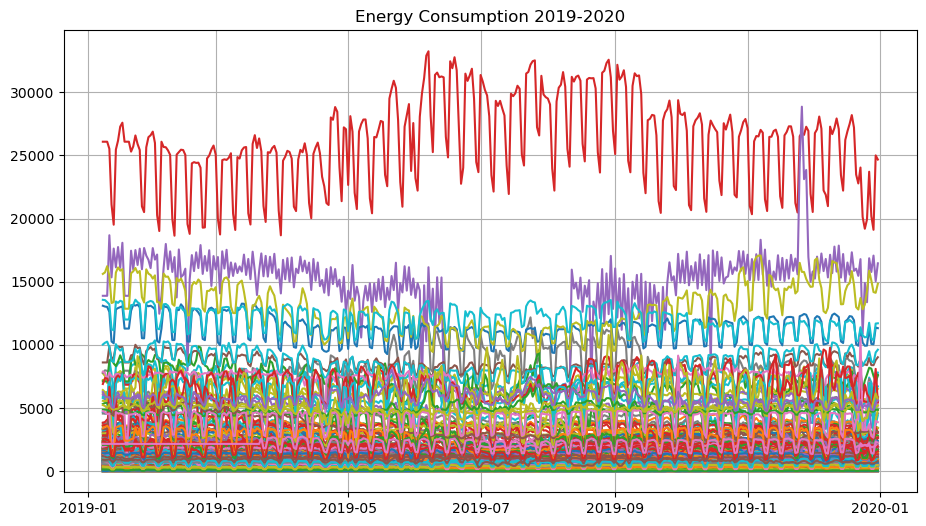

In [28]:
# Convert 'Date' column to datetime type
Date_loc['Date'] = pd.to_datetime(Date_loc['Date'])

# Set 'Date' as the index
Date_loc.set_index('Date', inplace=True)

# Convert date strings to datetime objects
start_date = datetime.datetime.strptime('2019-01-08', '%Y-%m-%d').date()
end_date = datetime.datetime.strptime('2019-12-31', '%Y-%m-%d').date()

# Perform the slice operation
Date_2019_1 = Date_loc[start_date:end_date]

# Create a single subplot
fig, ax = plt.subplots(figsize=(11, 6))

# Plot the data
ax.plot(Date_2019_1, '-')
ax.set_title('Energy Consumption 2019-2020')
ax.grid(True)

# Display the plot
plt.show()


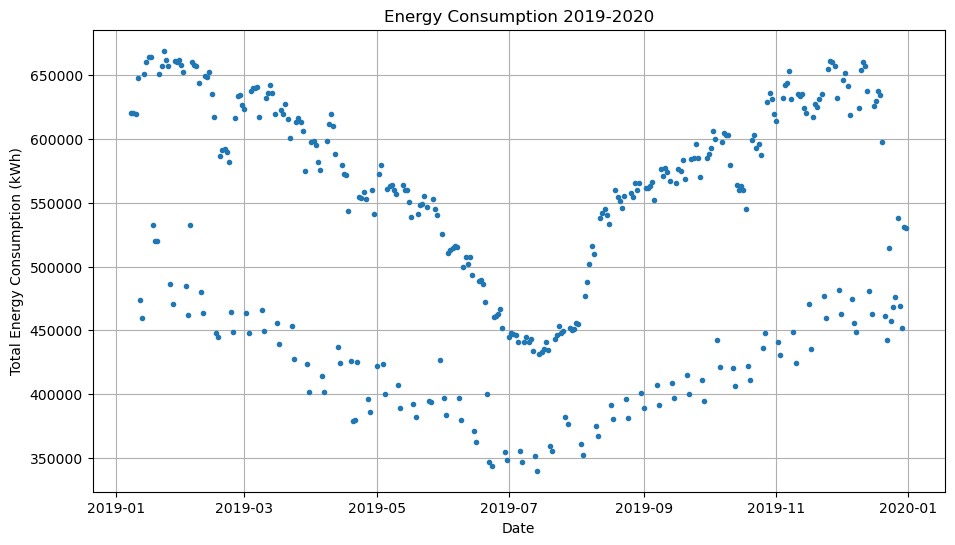

In [29]:
# Calculate the total consumption by summing the values of each row
yearly_con = Date_2019_1.sum(axis=1).to_frame(name='kWh')

# Rename the index to 'Date'
yearly_con.index.rename('Date', inplace=True)

# Create a single subplot
fig, ax = plt.subplots(figsize=(11, 6))

# Plot the data
ax.plot(yearly_con.index, yearly_con['kWh'], '.')
ax.set_title('Energy Consumption 2019-2020')
ax.set_xlabel('Date')
ax.set_ylabel('Total Energy Consumption (kWh)')
ax.grid(True)

# Display the plot
plt.show()


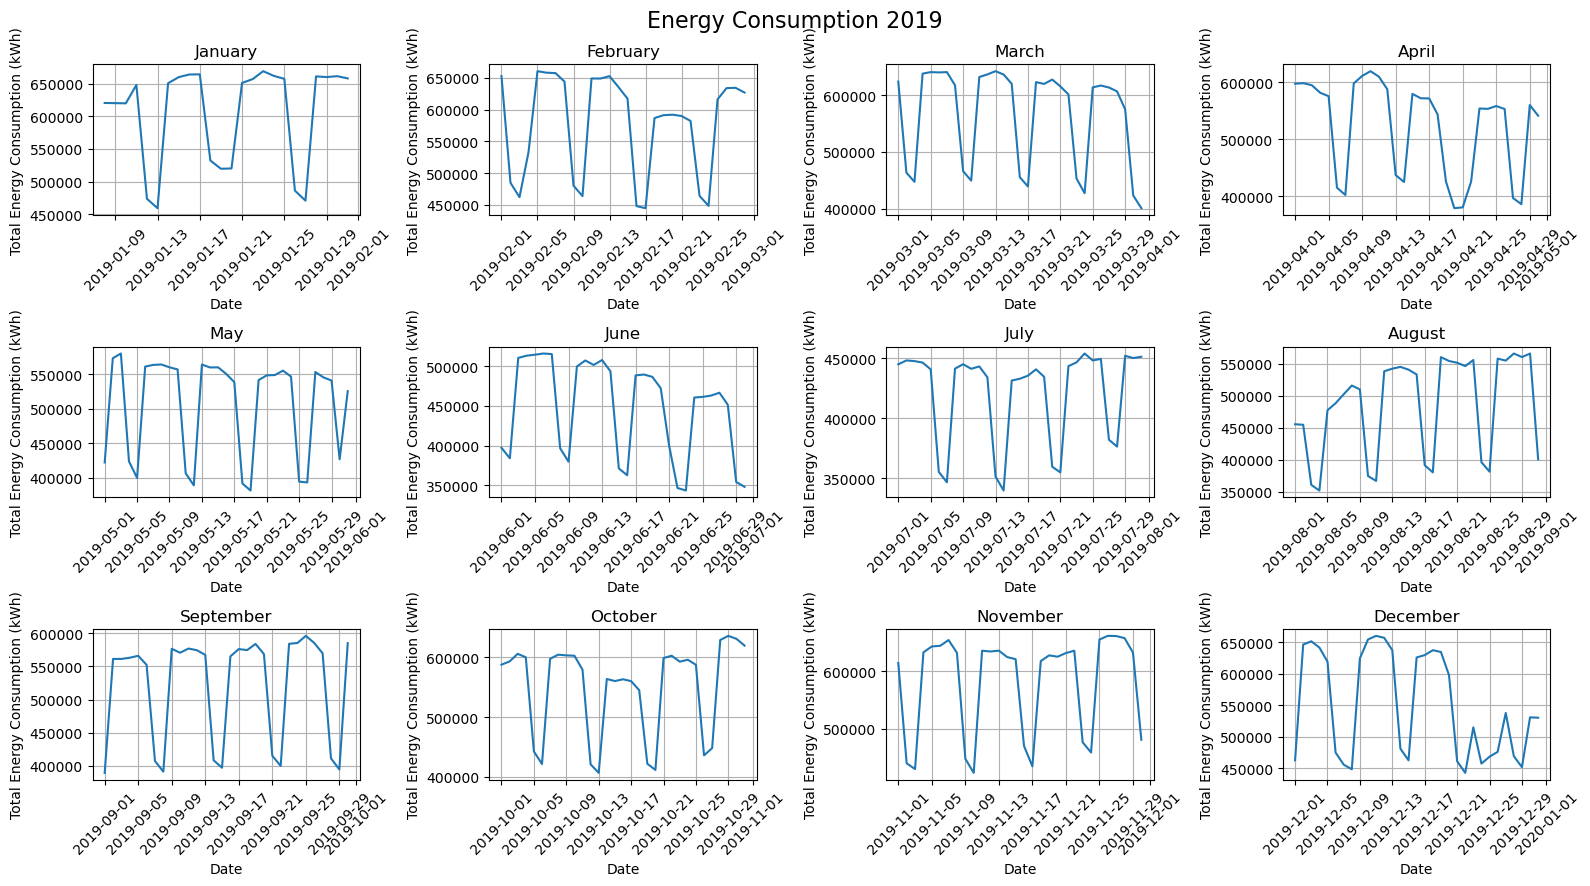

In [30]:
# Create a figure and subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9))
fig.suptitle('Energy Consumption 2019', fontsize=16)

# Iterate over the months and plot the data
for month in range(1, 13):
    month_data = yearly_con[yearly_con.index.month == month]
    ax = axes[(month - 1) // 4, (month - 1) % 4]
    ax.plot(month_data.index, month_data['kWh'], '-')
    ax.set_title(month_data.index[0].strftime('%B'))
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Energy Consumption (kWh)')
    ax.grid(True)
    ax.xaxis.set_tick_params(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


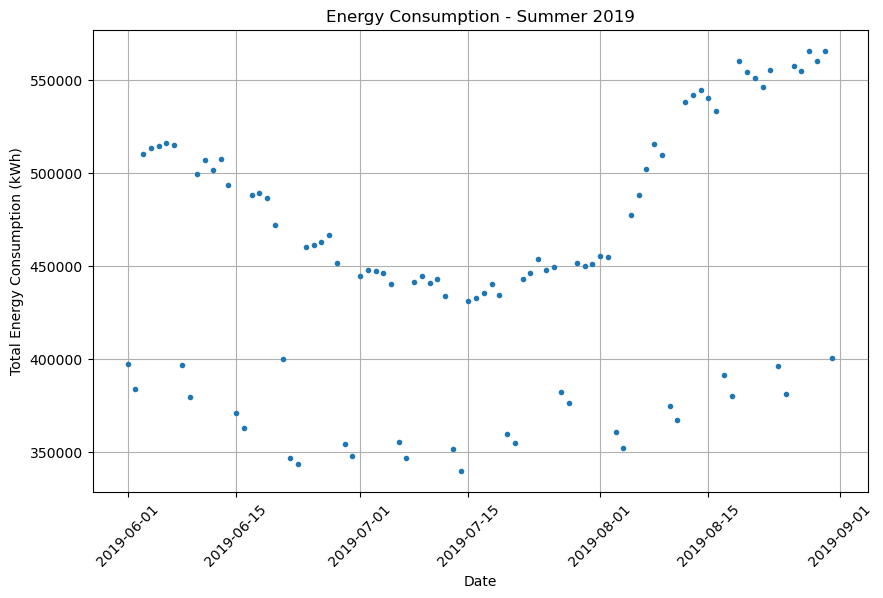

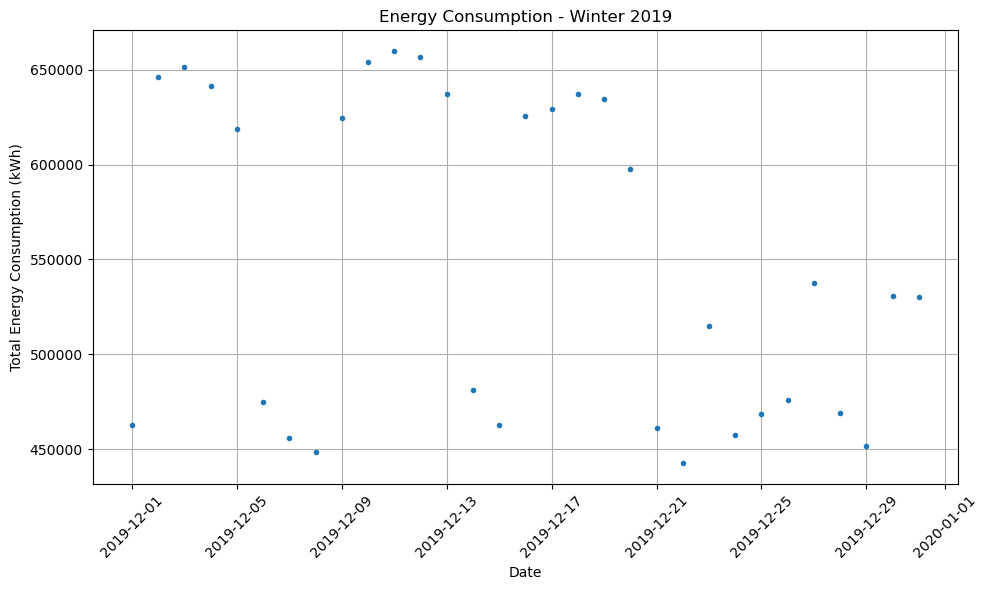

In [31]:
# Define the datetime ranges for summer and winter seasons
summer_range = (datetime.date(start_date.year, 6, 1), datetime.date(start_date.year, 8, 31))
winter_range = (datetime.date(start_date.year, 12, 1), datetime.date(end_date.year, 12, 31))

# Create a figure and subplots for summer
fig, ax_summer = plt.subplots(figsize=(10, 6))
ax_summer.set_title('Energy Consumption - Summer 2019')
ax_summer.set_xlabel('Date')
ax_summer.set_ylabel('Total Energy Consumption (kWh)')
ax_summer.grid(True)

# Plot the data for summer
summer_data = yearly_con[summer_range[0]:summer_range[1]]
ax_summer.plot(summer_data.index, summer_data['kWh'], '.')

# Rotate x-axis tick labels for better readability
ax_summer.xaxis.set_tick_params(rotation=45)

# Create a figure and subplots for winter
fig, ax_winter = plt.subplots(figsize=(10, 6))
ax_winter.set_title('Energy Consumption - Winter 2019')
ax_winter.set_xlabel('Date')
ax_winter.set_ylabel('Total Energy Consumption (kWh)')
ax_winter.grid(True)

# Plot the data for winter
winter_data = yearly_con[winter_range[0]:winter_range[1]]
ax_winter.plot(winter_data.index, winter_data['kWh'], '.')

# Rotate x-axis tick labels for better readability
ax_winter.xaxis.set_tick_params(rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [32]:
groups_loc = df.groupby('Location')

# divide into different dataframes for each location
locs = [groups_loc.get_group(loc).set_index('Date')['Value'] for loc in groups_loc.groups]

# remove duplicated rows
locs = [df[~df.index.duplicated(keep='first')] for df in locs]

Date_loc = pd.concat(locs, join='outer', axis=1,  ignore_index=True)

Date_loc.columns = groups_loc.groups.keys() #location namewise in column

Date_loc


,1000 Hakaniemen kauppahalli,1001 Hietalahden kauppahalli,1002 Vanha kauppahalli,1037 Vuotalo,1507 Suutarilan monitoimitalo/ala-aste ja Lpk Seulanen,1508 Monitoimitalo Puustelli,1509 Lpk Karvikka ja rppk Lemmikki,1511 Pauligin huvila (disabled),1512 Malmin raitti 3,1513 Psykiatrinen poliklinikka,...,"6472 Vuorensyrjä 8, Jakomäen terveysasema","6473 Luutnantintie 12-16, Malminkartanon terveyskeskus","6474 Pikkalankatu 5, Malmin virastotalo","6475 Toinen linja 7, toimistorakennus (disabled)","6476 Vilppulantie 14, Stadin ammattiopisto","6477 Muotoilijankatu 3, Stadin ammattiopisto","6478 Savonkatu 4, Stadin ammattiopisto","6492 Kontukuja 5, Kontulan monipuolinen palvelukeskus","6743 Kivikonkuja 4, terveydenhuollon päätearkisto","6760 Kaupunkiympäristön toimiala, 44572 Kaupunkiympäristön toimitalo (disabled)"
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-08,0.00,1104.55,619.45,2585.05,2327.51,749.28,345.56,609.94,0.36,327.44,...,741.57,360.21,944.46,1427.64,3410.96,2097.2,2349.11,6270.62,911.35,NaN
2019-01-09,0.00,1164.13,600.80,2570.44,2321.11,723.47,338.88,610.81,0.35,303.12,...,763.84,344.86,926.57,1404.36,3505.27,2101.2,2335.64,5944.73,896.33,NaN
2019-01-10,0.00,1135.66,641.95,2557.09,2211.68,731.94,407.72,647.74,0.35,304.00,...,781.25,327.00,953.79,1455.24,3605.95,2092.8,2190.52,5860.85,912.56,NaN
2019-01-11,20.10,1211.13,614.15,2336.15,2183.17,667.25,416.68,646.19,0.35,300.00,...,733.31,318.27,885.38,1459.80,3397.60,2050.8,2346.09,5857.86,946.08,NaN
2019-01-12,30.56,1167.51,610.50,2031.74,1391.16,328.37,188.12,625.18,0.35,150.32,...,535.97,144.78,456.39,1179.00,1230.13,1084.0,1217.48,5102.65,819.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-03,NaN,998.30,791.75,2176.95,1643.99,501.08,179.56,668.75,0.35,308.16,...,777.97,311.55,939.87,1440.60,1733.00,1953.6,1198.42,5514.40,880.66,NaN
2019-01-04,NaN,1211.51,692.95,2198.87,1634.40,516.58,182.92,674.84,0.35,310.16,...,760.75,295.39,903.72,1422.36,2908.32,1964.8,1790.94,5834.67,892.68,NaN
2019-01-05,NaN,1162.45,692.50,2073.77,1360.43,329.82,74.08,680.31,0.36,158.40,...,576.20,142.18,489.73,1170.84,1187.90,1064.0,991.38,5195.75,805.62,NaN


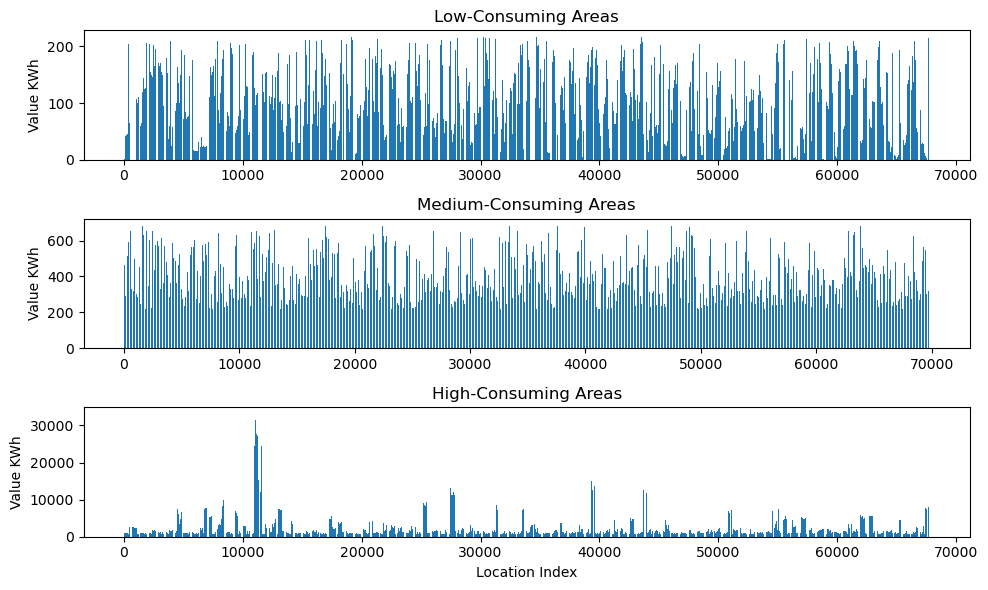

In [34]:

# Calculate the consumption threshold values for low, medium, and high-consuming areas
threshold_low = df['Value'].quantile(0.33)
threshold_high = df['Value'].quantile(0.67)

# Filter the DataFrame to include only the rows corresponding to the low, medium, and high-consuming areas
low_consuming_df = df[df['Value'] <= threshold_low]
medium_consuming_df = df[(df['Value'] > threshold_low) & (df['Value'] <= threshold_high)]
high_consuming_df = df[df['Value'] > threshold_high]

# Create three separate bar plots for low, medium, and high-consuming areas
fig, axes = plt.subplots(nrows=3, figsize=(10, 6))

# Low-consuming areas
axes[0].bar(range(len(low_consuming_df)), low_consuming_df['Value'])
axes[0].set_ylabel('Value KWh')
axes[0].set_title('Low-Consuming Areas')

# Medium-consuming areas
axes[1].bar(range(len(medium_consuming_df)), medium_consuming_df['Value'])
axes[1].set_ylabel('Value KWh')
axes[1].set_title('Medium-Consuming Areas')

# High-consuming areas
axes[2].bar(range(len(high_consuming_df)), high_consuming_df['Value'])
axes[2].set_xlabel('Location Index')
axes[2].set_ylabel('Value KWh')
axes[2].set_title('High-Consuming Areas')

# Adjust the layout to prevent overlapping of x-axis labels
plt.tight_layout()

# Display the plots
plt.show()


C:\Users\login\AppData\Local\Temp\ipykernel_20592\1168676358.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_data = df.groupby('Category')['Value'].mean()


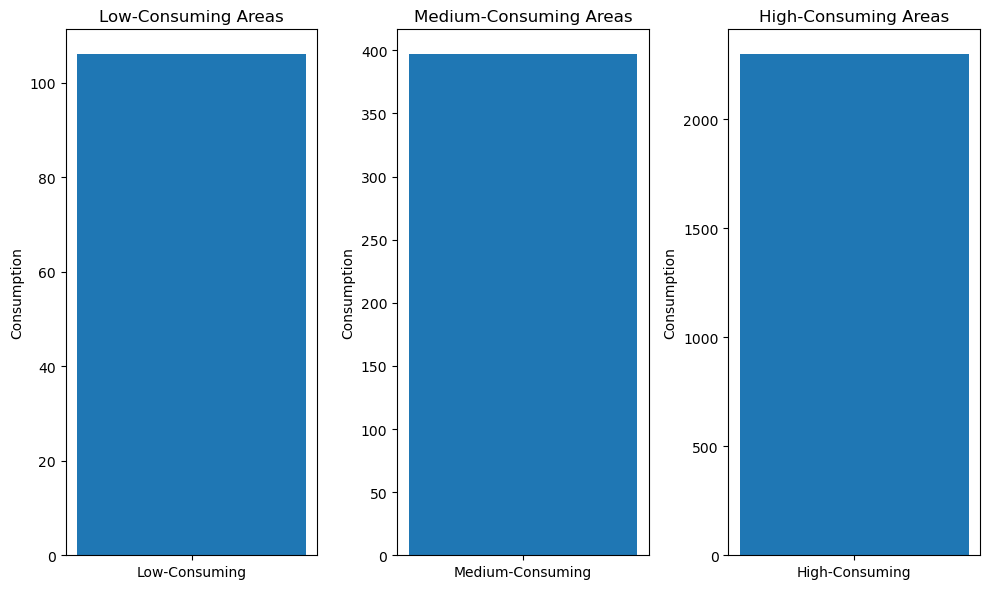

In [35]:
# Categorize the locations based on consumption levels
df['Category'] = pd.cut(df['Value'], bins=[df['Value'].min(), threshold_low, threshold_high, df['Value'].max()], labels=['Low-Consuming', 'Medium-Consuming', 'High-Consuming'])

# Group the DataFrame by category and calculate the average consumption for each category
category_data = df.groupby('Category')['Value'].mean()

# Create a bar plot for each category
plt.figure(figsize=(10, 6))

plt.subplot(131)
low_consuming = category_data['Low-Consuming']
plt.bar('Low-Consuming', low_consuming)
#plt.xlabel('Low-Consuming')
plt.ylabel('Consumption')
plt.title('Low-Consuming Areas')

plt.subplot(132)
medium_consuming = category_data['Medium-Consuming']
plt.bar('Medium-Consuming', medium_consuming)
#plt.xlabel('Medium-Consuming')
plt.ylabel('Consumption')
plt.title('Medium-Consuming Areas')

plt.subplot(133)
high_consuming = category_data['High-Consuming']
plt.bar('High-Consuming', high_consuming)
#plt.xlabel('High-Consuming')
plt.ylabel('Consumption')
plt.title('High-Consuming Areas')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


In [36]:
# Group the DataFrame by category and get the locations for each category
low_consuming_locations = df[df['Category'] == 'Low-Consuming']['Location']
medium_consuming_locations = df[df['Category'] == 'Medium-Consuming']['Location']
high_consuming_locations = df[df['Category'] == 'High-Consuming']['Location']

# Print the first few locations in each consuming category
print("Low-Consuming Areas:")
print(low_consuming_locations.sample(5))

print("\nMedium-Consuming Areas:")
print(medium_consuming_locations.sample(5))

print("\nHigh-Consuming Areas:")
print(high_consuming_locations.sample(5))


Low-Consuming Areas:
12708                     1650 Hoplaxskolan/Dh Sockenstugan
89735                                      4197 Lpk Marmori
20661                                      1755 Lpk Pihlaja
184876        6471 Meripihkatie 8, Pihlajamäen terveysasema
13339     1652 Laajasalon kirj.NT ja Lpk Koulutanhua,Rpp...
Name: Location, dtype: object

Medium-Consuming Areas:
68920                                       4116 Lpk Keula
196410                        4461 Roihupelto väestönsuoja
181612    4708 Asuintalo, Kuninkaantammentie 20 (disabled)
59063                                  4078 Lpk Veräjämäki
138358                        4380 Pohjois-Haagan ala-aste
Name: Location, dtype: object

High-Consuming Areas:
131309                     4354 Suursuon virastotalo (suvi)
118689    4305 Porolahden pk (ala-aste), kirjasto, hammash.
194421                   4384 Torkkelinmäki väestönsuoja/PO
137906           4379 Pikku-Huopalahden ala-aste, Lpk Purje
181038                              

In [47]:
# Perform normalization test - Shapiro-Wilk test
summer_norm_test = stats.shapiro(summer_data)
winter_norm_test = stats.shapiro(winter_data)

# Perform hypothesis test - Student's t-test
t_stat, p_value = stats.ttest_ind(summer_data, winter_data, equal_var=False)

# Null hypothesis and alternative hypothesis
null_hypothesis = "There is no significant difference in the means of summer and winter energy consumption."
alternative_hypothesis = "There is a significant difference in the means of summer and winter energy consumption."

# Significance level (alpha)
alpha = 0.05

# Print the results
print("Normalization Test (Shapiro-Wilk):")
print(f"Summer - p-value: {summer_norm_test.pvalue:.4f}")
print(f"Winter - p-value: {winter_norm_test.pvalue:.4f}")
print("\nHypothesis Test (Student's t-test):")
#print(f"Null Hypothesis: {null_hypothesis}")
#print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"\nt-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Compare p-value with alpha
if p_value < alpha:
    print("\nReject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the alternative hypothesis.")


Normalization Test (Shapiro-Wilk):
Summer - p-value: 0.0014
Winter - p-value: 0.0001

Hypothesis Test (Student's t-test):

t-statistic: [-5.9012186]
p-value: [5.00115016e-07]

Reject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.


#In summary, based on the results of both the normality tests and the hypothesis test, we can conclude that there is a significant difference in the means of summer and winter energy consumption.